In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
#target value counts
df['koi_disposition'].value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [4]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [5]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact','koi_duration', 'koi_depth', 'koi_prad', 
       'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',  'koi_slogg', 
       'koi_srad',  'ra', 'dec','koi_kepmag']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
target = df['koi_disposition']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(selected_features,target,test_size = 0.2)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
2655,0,1,0,0,2.879243,170.710636,0.709,2.6273,48050.0,21.02,1244,565.39,200.5,1,5941,4.533,0.885,281.77554,47.593250,14.371
3194,0,0,0,0,8.617427,133.508630,0.059,2.7130,154.9,1.01,733,68.28,11.3,1,5009,4.491,0.840,292.46387,41.299068,14.790
2858,0,0,0,0,129.945392,176.822850,0.909,5.7860,500.1,1.18,177,0.23,13.1,5,3751,4.800,0.443,298.65271,43.955021,14.625
6583,1,0,0,0,213.201978,309.939500,0.214,15.3960,696.9,1.91,221,0.56,12.9,1,4594,4.557,0.752,290.21960,41.246811,15.599
6122,0,0,0,0,6.768901,133.077240,0.150,3.6160,123.1,1.24,1017,253.30,10.8,1,5737,4.327,1.125,294.40472,39.351681,14.725


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
# Use all data for X scaler
X_scaler = MinMaxScaler().fit(selected_features)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model
## K Nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled,y_train)
    train_score = knn.score(X_train_scaled,y_train)
    test_score = knn.score(X_test_scaled,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k},Train/Test Score: {train_score:.3f}/{test_score:.3f}")   

k: 1,Train/Test Score: 1.000/0.748
k: 3,Train/Test Score: 0.894/0.775
k: 5,Train/Test Score: 0.864/0.796
k: 7,Train/Test Score: 0.850/0.794
k: 9,Train/Test Score: 0.843/0.794
k: 11,Train/Test Score: 0.837/0.788
k: 13,Train/Test Score: 0.837/0.789
k: 15,Train/Test Score: 0.835/0.788
k: 17,Train/Test Score: 0.836/0.792
k: 19,Train/Test Score: 0.829/0.797


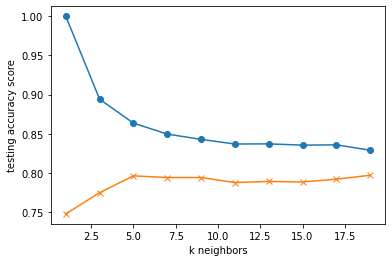

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1,20,2),train_scores,marker='o')
plt.plot(range(1,20,2),test_scores,marker = 'x')
plt.xlabel("k neighbors")
plt.ylabel("testing accuracy score")
plt.show()

In [16]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train_scaled,y_train)
print(f"Training Data Score for n=19: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score for n=19: {knn.score(X_test_scaled, y_test)}")

Training Data Score for n=19: 0.829041487839771
Testing Data Score for n=19: 0.7969978556111508


In [17]:
predictions = knn.predict(X_test_scaled)
pd.DataFrame({"actual":y_test,"prediction":predictions},columns = ["actual","prediction"]).head(20)

,actual,prediction
4071,FALSE POSITIVE,FALSE POSITIVE
5106,CONFIRMED,CANDIDATE
2973,FALSE POSITIVE,FALSE POSITIVE
3607,FALSE POSITIVE,FALSE POSITIVE
919,FALSE POSITIVE,FALSE POSITIVE
5584,FALSE POSITIVE,FALSE POSITIVE
5630,FALSE POSITIVE,FALSE POSITIVE
1513,CANDIDATE,CONFIRMED
2478,CONFIRMED,CONFIRMED
3085,FALSE POSITIVE,FALSE POSITIVE


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)